# 导入依赖库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义数据集类别

In [2]:
noise_threshold = 0.02
prec = 5

def create_DN(begin_val, end_val, stable_num1, decreasing_num, stable_num2):
  '''
  初始值高于阈值，最终值低于阈值
  稳定->下降->稳定
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成急剧下降的数据
  decreasing_data = np.linspace(begin_val, end_val, decreasing_num)
  # 生成后段稳定的数据
  stable_data2 = np.ones(stable_num2)*end_val
  # 合并所有数据
  data = np.concatenate((stable_data1, decreasing_data, stable_data2))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_DR1(begin_val, end_val, stable_num1, decreasing_num, increasing_num):
  '''
  初始值高于阈值，最终值无限制
  稳定->下降->上升
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成急剧下降的数据
  decreasing_data = np.linspace(begin_val, end_val, decreasing_num)
  # 生成逐渐上升的数据
  new_end = np.random.uniform(begin_val, end_val)
  increasing_data = np.linspace(end_val, new_end, increasing_num)
  data = np.concatenate((stable_data1, decreasing_data, increasing_data))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_DR2(begin_val, end_val, stable_num1, decreasing_num, increasing_num, stable_num2):
  '''
  初始值高于阈值，最终值小于初始值
  稳定->下降->上升->稳定（低于初始稳定值）
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成急剧下降的数据
  decreasing_data = np.linspace(begin_val, end_val, decreasing_num)
  # 生成逐渐上升的数据
  new_end = np.random.uniform(begin_val, end_val)
  increasing_data = np.linspace(end_val, new_end, increasing_num)
  # 生成后段稳定的数据
  stable_data2 = np.ones(stable_num2)*new_end
  data = np.concatenate((stable_data1, decreasing_data, increasing_data, stable_data2))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_DR3(begin_val, end_val, stable_num1, decreasing_num, increasing_num, stable_num2):
  '''
  初始值高于阈值，最终值高于阈值
  稳定->下降->上升->稳定（达到初始稳定值）
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成急剧下降的数据
  decreasing_data = np.linspace(begin_val, end_val, decreasing_num)
  # 生成逐渐上升的数据
  increasing_data = np.linspace(end_val, begin_val, increasing_num)
  # 生成后段稳定的数据
  stable_data2 = np.ones(stable_num2)*begin_val
  data = np.concatenate((stable_data1, decreasing_data, increasing_data, stable_data2))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_BD1(begin_val, end_val, stable_num1, increasing_num):
  '''
  初始低于阈值，最终值无限制
  稳定->上升
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成逐渐上升的数据
  increasing_data = np.linspace(begin_val, end_val, increasing_num)
  # 合并所有数据
  data = np.concatenate((stable_data1, increasing_data))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_BD2(begin_val, end_val, stable_num1, increasing_num, stable_num2):
  '''
  初始低于阈值，最终值高于阈值
  稳定->上升->稳定
  '''
  # 生成前段稳定的数据
  stable_data1 = np.ones(stable_num1)*begin_val
  # 生成逐渐上升的数据
  increasing_data = np.linspace(begin_val, end_val, increasing_num)
  # 生成后段稳定的数据
  stable_data2 = np.ones(stable_num2)*end_val
  # 合并所有数据
  data = np.concatenate((stable_data1, increasing_data, stable_data2))
  # 数据精度设置
  data = np.round(data, prec)
  # 生成随机噪声
  noise = np.random.normal(0, noise_threshold, data.shape)
  # 将噪声添加到数据中
  data = data + noise
  return data

def create_SD(total_length):
    # 使用当前时间作为随机种子
    # np.random.seed()

    # 生成一条随机平移的直线
    # 首先，我们随机选择一个平移量
    shift = np.random.uniform(-0.92, 0.95)

    # 然后，我们生成一个长度为 total_length 的数组，其中的所有值都等于这个平移量
    line = np.full(total_length, shift)
    noise = np.random.normal(0, 0.01, total_length)
    data = line + noise

    return data

# def create_CD(length):
#   '''
#   多次扰动
#   '''
#   num_disturbances = np.random.randint(3, 6)

#   # 生成一条具有季节趋势且略有上升趋势的基曲线
#   base_curve = 0.5 + 0.1 * np.sin(2 * np.pi * np.linspace(0, 1, length))  # 季节变化
#   base_curve += 0.05 * np.linspace(0, 1, length)  # 总体略有上升趋势

#   # 使用高斯滤波器添加更平滑的波动
#   fluctuations = np.random.randn(length) * 0.1  # 更小的随机噪声
#   fluctuations = np.convolve(fluctuations, np.ones(5) / 5, mode='same')  # 高斯平滑

#   # 将干扰置于抖动中并确保多样性
#   disturbance_indices = np.linspace(0, length - 1, num_disturbances, endpoint=False).astype(int)
#   disturbance_indices += np.random.randint(-2, 3, size=num_disturbances)  # 添加抖动
#   fluctuations[disturbance_indices] = np.clip(fluctuations[disturbance_indices] + np.random.rand(num_disturbances) * 0.2 - 0.1, -0.2, 0.2)

#   # 整合
#   ndvi_curve = base_curve + fluctuations
#   return ndvi_curve

def create_CD(length, value_range=(-1,1)):
    '''
    多次扰动
    '''
    num_disturbances = np.random.randint(3, 6)

    # 生成一条具有季节趋势且略有上升趋势的基曲线
    base_curve = 0.2 + 0.1 * np.sin(2 * np.pi * np.linspace(0, 1, length))  # 季节变化
    base_curve += 0.05 * np.linspace(0, 1, length)  # 总体略有上升趋势

    # 使用高斯滤波器添加更平滑的波动
    fluctuations = np.random.randn(length) * 0.1  # 更小的随机噪声
    fluctuations = np.convolve(fluctuations, np.ones(5) / 5, mode='same')  # 高斯平滑

    # 将干扰置于抖动中并确保多样性
    disturbance_indices = np.linspace(0, length - 1, num_disturbances, endpoint=False).astype(int)
    disturbance_indices += np.random.randint(-2, 3, size=num_disturbances)  # 添加抖动
    fluctuations[disturbance_indices] = np.clip(fluctuations[disturbance_indices] + np.random.rand(num_disturbances) * 0.2 - 0.1, -0.2, 0.2)

    # 整合
    ndvi_curve = base_curve + fluctuations

    # 将数据值域缩放到指定范围
    min_val, max_val = value_range
    ndvi_curve = np.interp(ndvi_curve, (ndvi_curve.min(), ndvi_curve.max()), (min_val+0.1, max_val-0.1))

    return ndvi_curve

## 添加额外类别

In [3]:
def gen_line(val_begin, val_end, length):
  # 生成一条线段上的等间隔点
  y = np.linspace(val_begin, val_end, length)
  # 生成噪声
  noise = np.random.normal(0, 0.02, length)  # 均值为0，标准差为0.02的正态分布噪声
  # 添加噪声到线段上
  data = y + noise
  return data

def gen_up_then_down_curve(val_begin, val_mid, val_end, mid_pos, length):
  y_up = np.linspace(val_begin, val_mid, mid_pos)
  y_down = np.linspace(val_mid, val_end, length - mid_pos)
  y = np.concatenate((y_up, y_down))
  noise = np.random.normal(0, 0.02, length)
  data = y + noise
  return data

def gen_down_then_up_curve(val_begin, val_mid, val_end, mid_pos, length):
  y_down = np.linspace(val_begin, val_mid, mid_pos)
  y_up = np.linspace(val_mid, val_end, length - mid_pos)
  y = np.concatenate((y_down, y_up))
  noise = np.random.normal(0, 0.02, length)
  data = y + noise
  return data

0.08898007883979249 -0.7647369194533409 0.5957247622808832 33


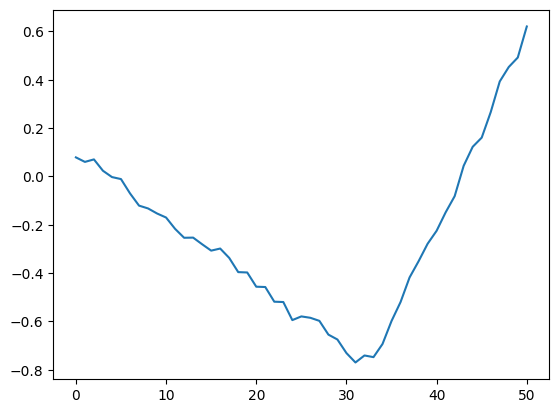

In [61]:
val_begin = np.random.uniform(0., 0.8)
val_mid = np.random.uniform(val_begin, -0.8)
val_end = np.random.uniform(val_mid, 0.8)
mid_pos = np.random.randint(5, 47)
print(val_begin, val_mid, val_end, mid_pos)
length = 51
data = gen_down_then_up_curve(val_begin, val_mid, val_end, mid_pos, length)
plt.plot(data)

In [65]:
# 生成n条这样的数据
n = 100
data = []

for _ in range(n):
  # 上升
  # val_begin = np.random.uniform(-0.8, 0.2)
  # val_end = np.random.uniform(val_begin, 0.9)

  # 下降
  # val_begin = np.random.uniform(0., 0.9)
  # val_end = np.random.uniform(val_begin, - 0.8)

  # 生成数据
  # y = gen_line(val_begin, val_end, 51)

  # 上升后下降
  # val_begin = np.random.uniform(-0.8, 0.3)
  # val_mid = np.random.uniform(0.3, 0.8)
  # val_end = np.random.uniform(-0.9, val_mid)
  # mid_pos = np.random.randint(3, 47)
  # y = gen_up_then_down_curve(val_begin, val_mid, val_end, mid_pos, 51)

  # 下降后上升
  val_begin = np.random.uniform(0., 0.8)
  val_mid = np.random.uniform(val_begin, -0.8)
  val_end = np.random.uniform(val_mid, 0.8)
  mid_pos = np.random.randint(5, 47)
  y = gen_down_then_up_curve(val_begin, val_mid, val_end, mid_pos, length)

  # 将曲线序列转换为字符串，以便写入CSV文件
  y_str = ','.join(map(str, y))
  data.append([y_str])

# 将数据转换为DataFrame
df = pd.DataFrame(data, columns=['data'])

# 将DataFrame保存为CSV文件
df.to_csv('F:/chrome/down_then_up_data.csv', index=False)

## 可视化以便检查数据是否正常

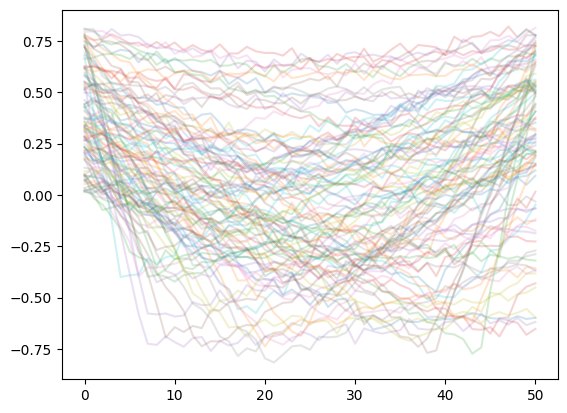

In [67]:
# 读取CSV文件
df = pd.read_csv('F:/chrome/down_then_up_data.csv')

# 创建一个新的图形和坐标轴
fig, ax = plt.subplots()

# 遍历DataFrame中的每一行
for index, row in df.iterrows():
    # 将字符串转换回浮点数列表
    curve = list(map(float, row['data'].split(',')))
    # 绘制曲线
    ax.plot(curve,alpha=0.2)

# 显示图形
plt.show()

# 创建数据集

In [5]:
# 生成数据集大小
num_datasets = 200

# 总长度为51
total_length = 51

# 创建一个空的DataFrame来存储数据
df = pd.DataFrame(columns=['dataset', 'label'])

# 定义类别和标签
categories = ['DN', 'DR1', 'DR3', 'BD1', 'BD2', 'CD', 'SD','UP', 'DOWN', 'UP_DOWN', 'DOWN_UP']
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print('begin generating....')
for i in range(num_datasets):
    for category, label in zip(categories, labels):
        if category in ['DN', 'DR1', 'DR3']:
            begin_val = np.random.uniform(0., 0.92)
            end_val = np.random.uniform(-0.9, 0.)
            n = 4 if category == 'DR3' else 3
            lengths = np.random.multinomial(total_length, np.ones(n) / n)
            data = globals()[f'create_{category}'](begin_val, end_val, *lengths)
        elif category in ['BD1', 'BD2']:
            begin_val = np.random.uniform(-0.9, 0.)
            end_val = np.random.uniform(0., 0.87)
            n = 2 if category == 'BD1' else 3
            lengths = np.random.multinomial(total_length, np.ones(n) / n)
            data = globals()[f'create_{category}'](begin_val, end_val, *lengths)
        elif category == 'SD':
            data = create_SD(total_length)
        elif category == 'CD':
            data = create_CD(total_length)
        elif category == 'UP':
            val_begin = np.random.uniform(-0.8, 0.2)
            val_end = np.random.uniform(val_begin, 0.9)
            data = gen_line(val_begin, val_end, total_length)
        elif category == 'DOWN':
            val_begin = np.random.uniform(0., 0.9)
            val_end = np.random.uniform(val_begin, - 0.8)
            data = gen_line(val_begin, val_end, total_length)
        elif category == 'UP_DOWN':
            val_begin = np.random.uniform(-0.8, 0.3)
            val_mid = np.random.uniform(0.3, 0.8)
            val_end = np.random.uniform(-0.9, val_mid)
            mid_pos = np.random.randint(5, 47)
            opt = np.random.randint(0,2)
            if opt:
                data = gen_up_then_down_curve(val_begin, val_mid, val_end, mid_pos, total_length)
            else:
                begin_val = np.random.uniform(0., 0.92)
                end_val = np.random.uniform(-0.9, 0.)
                n = 4
                lengths = np.random.multinomial(total_length, np.ones(n) / n)
                data = globals()['create_DR3'](begin_val, end_val, *lengths) * -1
        elif category == 'DOWN_UP':
            val_begin = np.random.uniform(0.2, 0.8)
            val_mid = np.random.uniform(0., -0.8)
            val_end = np.random.uniform(val_mid, 0.8)
            mid_pos = np.random.randint(5, 47)
            data = gen_down_then_up_curve(val_begin, val_mid, val_end, mid_pos, total_length)
        else:
            print('error command')

        # 将数据添加到DataFrame中
        new_row = pd.DataFrame({'dataset': [str(data.tolist())], 'label': [label]})
        df = pd.concat([df, new_row], ignore_index=True)

print('done generating, begin writing to local...')
# 将DataFrame保存到本地
df.to_csv('F:/chrome/datasets/dataset_update3.csv', index=False)
print('Done')

begin generating....
done generating, begin writing to local...
Done


# 可视化数据集

[0 1 2 3 4 5]


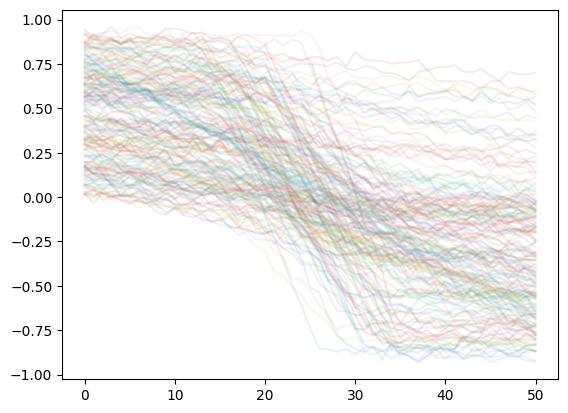

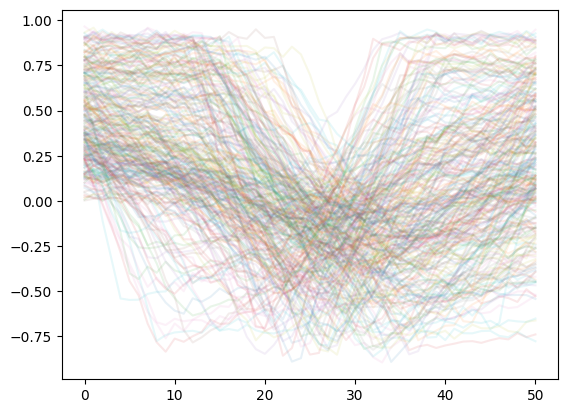

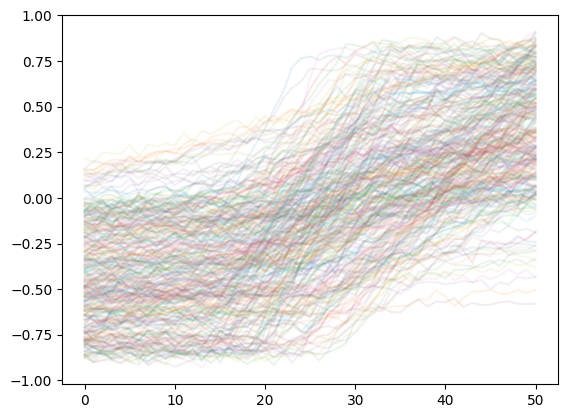

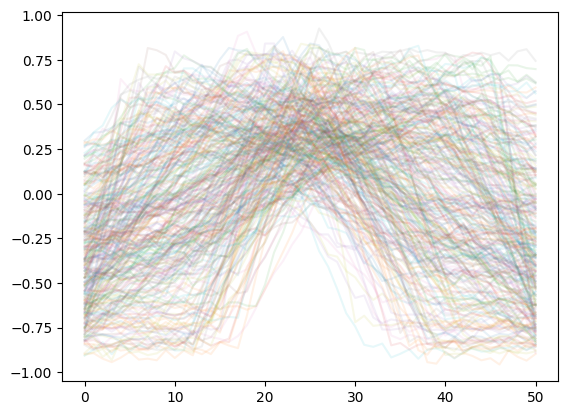

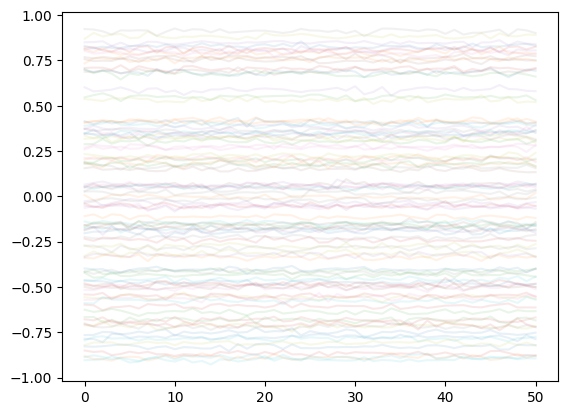

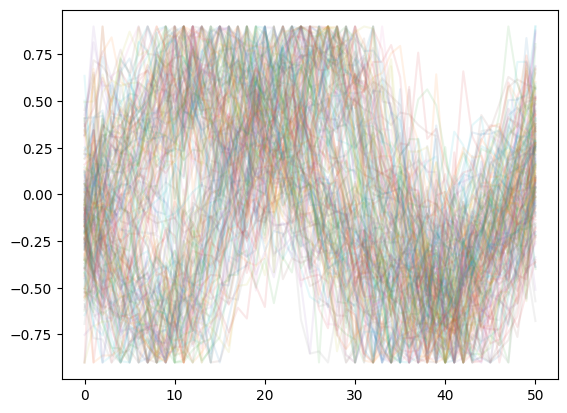

In [10]:
# Load the dataset
df = pd.read_csv("F:/chrome/datasets/dataset_update3_bkup.csv")

# 获取标签的唯一值
labels = df['label'].unique()
print(labels)

# 遍历每个标签
for label in labels:
    # 创建一个新的图形

    plt.figure()

    # 获取该标签的所有数据
    data = df[df['label'] == label]['dataset']

    # 将数据转换为列表
    data_list = [eval(i) for i in data]

    # 绘制数据
    for data in data_list:
        plt.plot(data,alpha=.1)

# 显示图形
plt.show()

# 保存图像
# plt.savefig(f'plot_{label}.png')